## [Bioclimatic variables](https://www.worldclim.org/bioclim)
* BIO1 = Annual Mean Temperature
* BIO2 = Mean Diurnal Range (Mean of monthly (max temp - min temp))
* BIO3 = Isothermality (* BIO2/* BIO7) (* 100)
* BIO4 = Temperature Seasonality (standard deviation *100)
* BIO5 = Max Temperature of Warmest Month
* BIO6 = Min Temperature of Coldest Month
* BIO7 = Temperature Annual Range (* BIO5-* BIO6)
* BIO8 = Mean Temperature of Wettest Quarter
* BIO9 = Mean Temperature of Driest Quarter
* BIO10 = Mean Temperature of Warmest Quarter
* BIO11 = Mean Temperature of Coldest Quarter
* BIO12 = Annual Precipitation
* BIO13 = Precipitation of Wettest Month
* BIO14 = Precipitation of Driest Month
* BIO15 = Precipitation Seasonality (Coefficient of Variation)
* BIO16 = Precipitation of Wettest Quarter
* BIO17 = Precipitation of Driest Quarter
* BIO18 = Precipitation of Warmest Quarter
* BIO19 = Precipitation of Coldest Quarter

[Bioclimatic Predictors for Supporting Ecological
Applications in the Conterminous United States](https://pubs.usgs.gov/ds/691/ds691.pdf)

# Load Data

In [977]:
# load dataframe package
import pandas as pd

### Temperature

* Data Source: [orchard_house-temp_hourly.csv](https://docs.google.com/document/d/1bobpeO5iTVWUPGmqVKgWOOqY08KOXc_ho0x2oaWguGU/edit)

In [667]:
src = '../src/orchard_house-temp_hourly.csv'
df = pd.read_csv(src, parse_dates=['datetime'], index_col='datetime')

In [668]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200790 entries, 2012-06-19 16:00:00 to 2019-04-21 17:00:00
Data columns (total 19 columns):
Day of the Week                                200790 non-null object
Outside Temperature Baldy Summit (°F)          186572 non-null float64
High Outside Temperature Baldy Summit (°F)     186906 non-null float64
Low Outside Temperature Baldy Summit (°F)      186906 non-null float64
Outside Temperature Baldy Draw (°F)            175416 non-null float64
High Outside Temperature Baldy Draw (°F)       177276 non-null float64
Low Outside Temperature Baldy Draw (°F)        177276 non-null float64
Outside Temperature Sanfoin Bench (°F)         175100 non-null float64
High Outside Temperature Sanfoin Bench (°F)    176606 non-null float64
Low Outside Temperature Sanfoin Bench (°F)     176606 non-null float64
Outside Temperature South Baldy (°F)           187560 non-null float64
High Outside Temperature South Baldy (°F)      187806 non-null float64
Low 

In [669]:
# select 'Baldy Summit, 'Baldy Draw', 'Sanfoin Bench', 'South Baldy', 'Orchard House', 'Indian Ridge'
df = df.iloc[:, [1, 4, 7, 10, 13, 16]]

In [689]:
# average all stations columns together by row
station_ave = df.mean(axis=1).to_frame(name='temp')

In [690]:
# 2012, 2013 and 2019 are incomplete, remove them
station_ave = station_ave['2014':'2018']

### Precipitation

* Data Source: [MPG Ranch Weather Stations - Precipitation - Hourly_Archive.csv](https://docs.google.com/document/d/1mt-xiSmcJPR3_txNfsalTUlFv9xZrKPLGUAHW0mVqk0/edit)

In [707]:
precip_src = '../src/MPG Ranch Weather Stations - Precipitation - Hourly_Archive.csv'

In [713]:
df_precip = pd.read_csv(precip_src, parse_dates=['Date Time'], index_col='Date Time')

In [714]:
df_precip.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200790 entries, 2012-06-19 16:00:00 to 2019-04-21 17:00:00
Data columns (total 6 columns):
Baldy Summit Rain (in)         200790 non-null float64
Baldy Draw Rain (in)           200790 non-null float64
Sanfoin Bench Rain (in)        200790 non-null float64
South Baldy Ridge Rain (in)    200790 non-null float64
Orchard House Rain (in)        200790 non-null float64
Indian Ridge Rain (in)         198485 non-null float64
dtypes: float64(6)
memory usage: 10.7 MB


In [712]:
df_precip.head()

,Date Time,Baldy Summit Rain (in),Baldy Draw Rain (in),Sanfoin Bench Rain (in),South Baldy Ridge Rain (in),Orchard House Rain (in),Indian Ridge Rain (in)
0,2012-06-19 16:00:00,0.0,0.0,0.0,0.0,0.0,NaN
1,2012-06-19 16:05:00,0.0,0.0,0.0,0.0,0.0,NaN
2,2012-06-19 16:10:00,0.0,0.0,0.0,0.0,0.0,NaN
3,2012-06-19 16:15:00,0.0,0.0,0.0,0.0,0.0,NaN
4,2012-06-19 16:20:00,0.0,0.0,0.0,0.0,0.0,NaN


In [715]:
# average ranch stations
p_ave = df_precip.mean(axis=1).to_frame(name='precip')

In [721]:
# 2012, 2013, and 2019 are incomplete, remove them
p_ave = p_ave['2014':'2018']

# Calculations

### BIO1 = Annual Mean Temperature

In [672]:
BIO1 = station_ave.groupby(pd.Grouper(freq='Y')).mean().round(1)

In [673]:
# rename index and column
BIO1 = BIO1.reset_index()
BIO1.columns = ['year', 'BIO1']

# reformat datetime
BIO1.year = BIO1.year.dt.year
BIO1 = BIO1.set_index('year')

In [674]:
BIO1

,BIO1
year,
2014,44.8
2015,47.3
2016,45.9
2017,44.7
2018,44.4


### BIO2 = Mean Diurnal Range (Mean of monthly (max temp - min temp))

In [1071]:
# select max and min values from month groups
max_temp = station_ave.groupby(pd.Grouper(freq='M')).max()
min_temp = station_ave.groupby(pd.Grouper(freq='M')).min()

monthly = max_temp - min_temp

In [1072]:
# calculate mean of monthly differences
BIO2 = monthly.groupby(pd.Grouper(freq='Y')).mean().round(1)

In [1022]:
# rename index and column
BIO2 = BIO2.reset_index()
BIO2.columns = ['year', 'range']

# reformat datetime
BIO2.year = BIO2.year.dt.year
BIO2 = BIO2.set_index('year')

In [1023]:
BIO2

,range
year,
2014,49.5
2015,48.2
2016,42.3
2017,44.6
2018,43.9


### BIO3 = Isothermality (BIO2/BIO7) (* 100)

In [1075]:
# processing

### BIO4 = Temperature Seasonality (standard deviation *100)

In [1076]:
# processing

### BIO5 = Max Temperature of Warmest Month

In [691]:
# identify  warmest month by year
warmest_months = []
years = station_ave.index.year.unique().tolist()

for year in years:
    warmest = 0
    # average temp values by month
    month_ave = station_ave[str(year)].groupby(pd.Grouper(freq='M')).mean()
    
    # loop through monthly averages and select warmest month year
    for index, row in month_ave.iterrows():
        if row.temp > warmest:
            warmest = row.temp
            year = index.year
            month = index.month
    warmest_month = {'year': year, 'month': month, 'warmest_average': warmest.round(1)}
    warmest_months.append(warmest_month)

In [692]:
warmest_months

[{'year': 2014, 'month': 7, 'warmest_average': 70.8},
 {'year': 2015, 'month': 6, 'warmest_average': 67.4},
 {'year': 2016, 'month': 8, 'warmest_average': 65.2},
 {'year': 2017, 'month': 7, 'warmest_average': 72.7},
 {'year': 2018, 'month': 7, 'warmest_average': 68.3}]

In [693]:
# select max value from warmest month by year
BIO5 = []
for value in warmest_months:
    year = str(value['year'])
    month = str(value['month'])
    max_value = station_ave[year + '-' + month].max()
    BIO5.append({'max_temp': max_value.temp.round(1), 'year': year, 'month': month})

In [603]:
BIO5

[{'max_temp': 89.8, 'year': '2014', 'month': '7'},
 {'max_temp': 94.3, 'year': '2015', 'month': '6'},
 {'max_temp': 87.9, 'year': '2016', 'month': '8'},
 {'max_temp': 95.6, 'year': '2017', 'month': '7'},
 {'max_temp': 86.7, 'year': '2018', 'month': '7'}]

In [694]:
BIO5 = pd.DataFrame(BIO5)

In [697]:
BIO5.loc[:, ['year', 'month', 'max_temp']]

,year,month,max_temp
0,2014,7,89.8
1,2015,6,94.3
2,2016,8,87.9
3,2017,7,95.6
4,2018,7,86.7


### BIO6 = Min Temperature of Coldest Month

In [698]:
# identify coldest month by year
coldest_months = []
years = station_ave.index.year.unique().tolist()

for year in years:
    coldest = 9999
    # average temp values by month
    month_ave = station_ave[str(year)].groupby(pd.Grouper(freq='M')).mean()
    
    # loop through monthly averages and find coldest month by year
    for index, row in month_ave.iterrows():    
        if row.temp < coldest:
            coldest = row.temp
            year = index.year
            month = index.month
    coldest_month = {'year': year, 'month': month, 'coldest_average': coldest.round(1)}
    coldest_months.append(coldest_month)

In [699]:
coldest_months

[{'year': 2014, 'month': 2, 'coldest_average': 19.5},
 {'year': 2015, 'month': 12, 'coldest_average': 26.9},
 {'year': 2016, 'month': 12, 'coldest_average': 20.3},
 {'year': 2017, 'month': 1, 'coldest_average': 18.3},
 {'year': 2018, 'month': 2, 'coldest_average': 24.1}]

In [700]:
# select min value from coldest month by year
BIO6 = []
for value in coldest_months:
    year = str(value['year'])
    month = str(value['month'])
    min_temp = station_ave[year + '-' + month].min()
    BIO6.append({'min_temp': min_temp.temp.round(1), 'year': year, 'month': month})

In [701]:
BIO6

[{'min_temp': -16.3, 'year': '2014', 'month': '2'},
 {'min_temp': 11.1, 'year': '2015', 'month': '12'},
 {'min_temp': -7.5, 'year': '2016', 'month': '12'},
 {'min_temp': -9.4, 'year': '2017', 'month': '1'},
 {'min_temp': -3.4, 'year': '2018', 'month': '2'}]

In [702]:
BIO6 = pd.DataFrame(BIO6)

In [703]:
BIO6.loc[:, ['year', 'month', 'min_temp']]

,year,month,min_temp
0,2014,2,-16.3
1,2015,12,11.1
2,2016,12,-7.5
3,2017,1,-9.4
4,2018,2,-3.4


### BIO7 = Temperature Annual Range (BIO5-BIO6)

In [991]:
BIO7 = (BIO5.max_temp - BIO6.min_temp).round(1).to_list()

In [1004]:
BIO7 = []

for index, row in BIO5.iterrows():
    temp_range = BIO5.loc[index, 'max_temp'] - BIO6.loc[index, 'min_temp']
    year = row.year
    BIO7.append({'year': year, 'range': temp_range.round(1)})

In [1005]:
BIO7 = pd.DataFrame(BIO7).set_index('year')
BIO7

,range
year,
2014,106.1
2015,83.2
2016,95.4
2017,105.0
2018,90.1


### BIO8 = Mean Temperature of Wettest Quarter

In [859]:
# sum precip quarters
precip_quarters = p_ave.groupby(pd.Grouper(freq='Q')).sum()

In [860]:
wettest_quarter = []

# find wettest quarter
for year in precip_quarters.index.year.unique().tolist():
    wettest = -1
    
    for index, row in precip_quarters[str(year)].iterrows():
        if row.precip > wettest:
            wettest = row.precip
            quarter = str(index.year) + '-' + str(index.month)
    print(quarter, wettest.round(2))
    # store wettest quarters in array
    wettest_quarter.append(quarter)

2014-12 3.73
2015-12 2.69
2016-6 3.85
2017-6 5.14
2018-6 7.38


In [760]:
temperature_quarterly = station_ave.groupby(pd.Grouper(freq='Q')).mean()

In [783]:
BIO8 = []

for quarter in wettest_quarter:
    BIO8.append({'wettest_quarter': quarter, 'mean_temp': temperature_quarterly[quarter]['temp'][0].round(2)})


datetime
2014-12-31    35.338261
Freq: Q-DEC, Name: temp, dtype: float64
datetime
2015-12-31    35.160726
Freq: Q-DEC, Name: temp, dtype: float64
datetime
2016-06-30    53.830628
Freq: Q-DEC, Name: temp, dtype: float64
datetime
2017-06-30    51.159451
Freq: Q-DEC, Name: temp, dtype: float64
datetime
2018-06-30    51.0202
Freq: Q-DEC, Name: temp, dtype: float64


In [788]:
BIO8 = pd.DataFrame(BIO8)
BIO8.set_index('wettest_quarter')

,mean_temp
wettest_quarter,
2014-12,35.34
2015-12,35.16
2016-6,53.83
2017-6,51.16
2018-6,51.02


### BIO9 = Mean Temperature of Driest Quarter

In [789]:
precip_quarters = p_ave.groupby(pd.Grouper(freq='Q')).sum()

In [797]:
years = precip_quarters.index.year.unique().tolist()
driest_quarter = []

# find driest quarter
for year in years:
    driest = 999
    
    for index, row in precip_quarters[str(year)].iterrows():
        if row.precip < driest:
            driest = row.precip
            quarter = str(index.year) + '-' + str(index.month)
    print(quarter, driest)
    driest_quarter.append(quarter)

2014-9 1.818333333333335
2015-6 2.0583333333333345
2016-3 1.5233333333333383
2017-9 1.2083333333333344
2018-9 0.7366666666666669


In [798]:
temperature_quarterly = station_ave.groupby(pd.Grouper(freq='Q')).mean()

In [801]:
BIO9 = []

for quarter in driest_quarter:
    BIO9.append({'driest_quarter': quarter, 'mean_temp': temperature_quarterly[quarter]['temp'][0].round(2)})

In [804]:
BIO9 = pd.DataFrame(BIO9)
BIO9.set_index('driest_quarter')

,mean_temp
driest_quarter,
2014-9,64.65
2015-6,54.53
2016-3,33.47
2017-9,65.34
2018-9,62.63


### BIO10 = Mean Temperature of Warmest Quarter

In [805]:
# calculate quarterly temperature
temperature_quarterly = station_ave.groupby(pd.Grouper(freq='Q')).mean()

In [817]:
BIO10 = []

for year in temperature_quarterly.index.year.unique().tolist():
    warmest = -999
    
    for index, row in temperature_quarterly[str(year)].iterrows():
        if row.temp > warmest:
            warmest = row.temp
            quarter = str(index.year) + '-' + str(index.month)
    BIO10.append({'warmest_quarter': quarter, 'mean_temp': warmest.round(2)})

In [818]:
BIO10 = pd.DataFrame(BIO10).set_index('warmest_quarter')

In [819]:
BIO10

,mean_temp
warmest_quarter,
2014-9,64.65
2015-9,63.61
2016-9,61.64
2017-9,65.34
2018-9,62.63


### BIO11 = Mean Temperature of Coldest Quarter

In [820]:
# calculate quarterly temperature
temperature_quarterly = station_ave.groupby(pd.Grouper(freq='Q')).mean()

In [824]:
BIO11 = []

for year in temperature_quarterly.index.year.unique().tolist():
    coldest = 999
    
    for index, row in temperature_quarterly[str(year)].iterrows():
        if row.temp < coldest:
            coldest = row.temp
            quarter = str(index.year) + '-' + str(index.month)
    BIO11.append({'coldest_quarter': quarter, 'mean_temp': coldest.round(2)})

In [825]:
BIO11 = pd.DataFrame(BIO11).set_index('coldest_quarter')

In [826]:
BIO11

,mean_temp
coldest_quarter,
2014-3,28.43
2015-12,35.16
2016-3,33.47
2017-3,28.77
2018-3,30.03


### BIO12 = Annual Precipitation

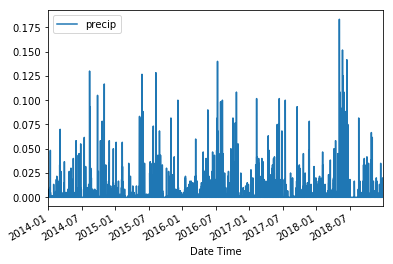

In [839]:
p_ave.plot()

In [833]:
BIO12 = p_ave.groupby(pd.Grouper(freq='Y')).sum()

In [834]:
BIO12

,precip
Date Time,
2014-12-31,10.820000
2015-12-31,9.183333
2016-12-31,11.490000
2017-12-31,12.668333
2018-12-31,13.968333


### BIO13 = Precipitation of Wettest Month

In [840]:
monthly_precip = p_ave.groupby(pd.Grouper(freq='M')).sum()

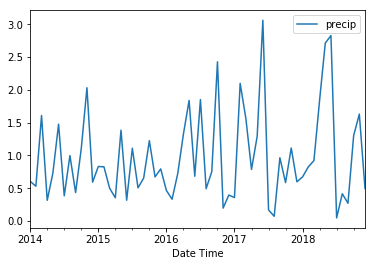

In [842]:
monthly_precip.plot();

In [852]:
BIO13 = []

for year in monthly_precip.index.year.unique().tolist():
    wettest_month = -999
    
    for index, row in monthly_precip[str(year)].iterrows():
        if row.precip > wettest_month:
            wettest_month = row.precip
            month = str(index.year) + '-' + str(index.month)
    BIO13.append({'wettest_month': wettest_month.round(2), 'month': month})
print(BIO13)

[{'wettest_month': 2.03, 'month': '2014-11'}, {'wettest_month': 1.39, 'month': '2015-5'}, {'wettest_month': 2.43, 'month': '2016-10'}, {'wettest_month': 3.06, 'month': '2017-6'}, {'wettest_month': 2.83, 'month': '2018-6'}]


In [854]:
BIO13 = pd.DataFrame(BIO13).set_index('month')
BIO13

,wettest_month
month,
2014-11,2.03
2015-5,1.39
2016-10,2.43
2017-6,3.06
2018-6,2.83


### BIO14 = Precipitation of Driest Month

In [879]:
monthly_precip = p_ave.groupby(pd.Grouper(freq='M')).sum()

In [882]:
BIO14 = []

for year in monthly_precip.index.year.unique().tolist():
    driest_month = 999
    
    for index, row in monthly_precip[str(year)].iterrows():
        if row.precip < driest_month:
            driest_month = row.precip
            month = str(index.year) + '-' + str(index.month)
    BIO14.append({'precip (in)': driest_month.round(2), 'driest_month': month})
print(BIO14)

[{'precip (in)': 0.32, 'driest_month': '2014-4'}, {'precip (in)': 0.32, 'driest_month': '2015-6'}, {'precip (in)': 0.2, 'driest_month': '2016-11'}, {'precip (in)': 0.07, 'driest_month': '2017-8'}, {'precip (in)': 0.05, 'driest_month': '2018-7'}]


In [887]:
BIO14 = pd.DataFrame(BIO14).set_index('driest_month')
BIO14

,precip (in)
driest_month,
2014-4,0.32
2015-6,0.32
2016-11,0.20
2017-8,0.07
2018-7,0.05


### BIO15 = Precipitation Seasonality (Coefficient of Variation)

In [1077]:
# processing

### BIO16 = Precipitation of Wettest Quarter

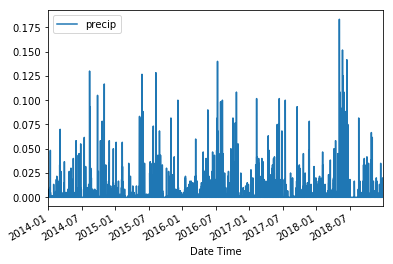

In [907]:
# average precipitation of all stations
p_ave.plot()

In [908]:
# quarterly precip
q_precip = p_ave.groupby(pd.Grouper(freq='Q')).sum()

In [909]:
BIO16 = []

for year in q_precip.index.year.unique().tolist():
    wettest_quarter = -999
    
    for index, row in q_precip[str(year)].iterrows():
        if row.precip > wettest_quarter:
            wettest_quarter = row.precip
            quarter = str(index.year) + '-' + str(index.month)
    BIO16.append({'precip (in)': wettest_quarter.round(2), 'wettest_quarter': quarter})

In [910]:
BIO16 = pd.DataFrame(BIO16).set_index('wettest_quarter')
BIO16

,precip (in)
wettest_quarter,
2014-12,3.73
2015-12,2.69
2016-6,3.85
2017-6,5.14
2018-6,7.38


### BIO17 = Precipitation of Driest Quarter

In [896]:
# average precipitation of all stations
p_ave

,precip
Date Time,
2014-01-01 00:00:00,0.0
2014-01-01 00:30:00,0.0
2014-01-01 01:00:00,0.0
2014-01-01 01:30:00,0.0
2014-01-01 02:00:00,0.0
2014-01-01 02:30:00,0.0
2014-01-01 03:00:00,0.0
2014-01-01 03:30:00,0.0
2014-01-01 04:00:00,0.0


In [897]:
q_precip = p_ave.groupby(pd.Grouper(freq='Q')).sum()

In [903]:
BIO17 = []

for year in q_precip.index.year.unique().tolist():
    driest_quarter = 999
    
    for index, row in q_precip[str(year)].iterrows():
        if row.precip < driest_quarter:
            driest_quarter = row.precip
            quarter = str(index.year) + '-' + str(index.month)
    BIO17.append({'precip (in)': driest_quarter.round(2), 'driest_quarter': quarter})

In [904]:
BIO17 = pd.DataFrame(BIO17).set_index('driest_quarter')
BIO17

,precip (in)
driest_quarter,
2014-9,1.82
2015-6,2.06
2016-3,1.52
2017-9,1.21
2018-9,0.74


### BIO18 = Precipitation of Warmest Quarter

In [914]:
# quarterly temperature average
q_temp = station_ave.groupby(pd.Grouper(freq='Q')).mean()

In [937]:
# calculate warmest quarter for each year
warmest_quarter = []

for year in q_temp.index.year.unique().tolist():
    warmest_temp = -999
    for index, row in q_temp[str(year)].iterrows():
        if row.temp > warmest_temp:
            warmest_temp = row.temp
            date_q = str(index.year) + '-' + str(index.month)
    warmest_quarter.append({'warmest_quarter': date_q, 'temp': warmest_temp.round(1)})

In [940]:
warmest_quarter = pd.DataFrame(warmest_quarter)
warmest_quarter

,temp,warmest_quarter
0,64.7,2014-9
1,63.6,2015-9
2,61.6,2016-9
3,65.3,2017-9
4,62.6,2018-9


In [983]:
# quarterly precipitation sum
q_precip = p_ave.groupby(pd.Grouper(freq='Q')).sum()

In [984]:
BIO18 = []

# use warmest quarter to select for precipitation
for index, row in warmest_quarter.iterrows():
    precip = q_precip[str(row.warmest_quarter)].iloc[0]['precip'].round(2)
    BIO18.append({'warmest_quarter': row.warmest_quarter, 'precip (in)': precip})

In [985]:
BIO18 = pd.DataFrame(BIO18).set_index('warmest_quarter')
BIO18

,precip (in)
warmest_quarter,
2014-9,1.82
2015-9,2.27
2016-9,3.10
2017-9,1.21
2018-9,0.74


### BIO19 = Precipitation of Coldest Quarter

In [974]:
# quarterly temperature average
q_temp = station_ave.groupby(pd.Grouper(freq='Q')).mean()

In [975]:
# caluculate coldest quarter for each year
coldest_quarter = []

for year in q_temp.index.year.unique().tolist():
    coldest_temp = 999
    for index, row in q_temp[str(year)].iterrows():
        if row.temp < coldest_temp:
            coldest_temp = row.temp
            date_q = str(index.year) + '-' + str(index.month)
    coldest_quarter.append({'coldest_quarter': date_q, 'temp': coldest_temp.round(1)})

In [980]:
coldest_quarter = pd.DataFrame(coldest_quarter)
coldest_quarter

,coldest_quarter,temp
0,2014-3,28.4
1,2015-12,35.2
2,2016-3,33.5
3,2017-3,28.8
4,2018-3,30.0


In [978]:
# quarterly precipitation sum
q_precip = p_ave.groupby(pd.Grouper(freq='Q')).sum()

In [986]:
BIO19 = []

# use coldest quarter to select for precipitation
for index, row in coldest_quarter.iterrows():
    precip = q_precip[str(row.coldest_quarter)].iloc[0]['precip'].round(2)
    BIO19.append({'coldest_quarter': row.coldest_quarter, 'precip (in)': precip})

In [988]:
BIO19 = pd.DataFrame(BIO19).set_index('coldest_quarter')
BIO19

,precip (in)
coldest_quarter,
2014-3,2.74
2015-12,2.69
2016-3,1.52
2017-3,4.02
2018-3,2.42
